In [246]:
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [247]:
sale =pd.read_csv('Date and model wise sale.csv')

# Data cleansing 

In [248]:
sale.head()

Date Model  Count
0  31-Aug-16   M45      5
1  31-Aug-16  M121      3
2  31-Aug-16  M122      4
3  31-Aug-16   M91     10
4  31-Aug-16   M66     57

In [249]:
print("Shape of sale dataset",sale.shape)

Shape of sale dataset (46116, 3)


In [250]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46116 entries, 0 to 46115
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    46116 non-null  object
 1   Model   46116 non-null  object
 2   Count   46116 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [251]:
# number of unique values
sale.nunique()

Date      971
Model     124
Count    1191
dtype: int64

In [252]:
#checking for missing values
sale.isnull().sum()

Date     0
Model    0
Count    0
dtype: int64

In [253]:
sale.columns

Index(['Date', 'Model', 'Count'], dtype='object')

In [254]:
# Removing duplicate rows
sale=sale.drop_duplicates(keep='first')

In [255]:
sale.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 46116 entries, 0 to 46115
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    46116 non-null  object
 1   Model   46116 non-null  object
 2   Count   46116 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [256]:
sale.value_counts

<bound method DataFrame.value_counts of             Date Model  Count
0      31-Aug-16   M45      5
1      31-Aug-16  M121      3
2      31-Aug-16  M122      4
3      31-Aug-16   M91     10
4      31-Aug-16   M66     57
...          ...   ...    ...
46111  01-Jan-14   M74      1
46112  01-Jan-14   M59      1
46113  01-Jan-14   M60      5
46114  01-Jan-14   M54      1
46115  01-Jan-14   M58      1

[46116 rows x 3 columns]>

In [257]:
sale.shape

(46116, 3)

In [258]:
sale['Date'] = pd.to_datetime(sale['Date'], dayfirst=True)
sale['Date'] = sale['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
sale.head()

Date Model  Count
0  2016-08-31   M45      5
1  2016-08-31  M121      3
2  2016-08-31  M122      4
3  2016-08-31   M91     10
4  2016-08-31   M66     57

# Data visualize

In [259]:
import plotly.express as px
import chart_studio.plotly as py
fig = px.line(sale, x='Date', y='Count')

# Use date string to set xaxis range
fig.update_layout(xaxis_range=['2016-08-31','2014-01-1'],
                  title_text=" Sale on Date")
fig.show()
 

In [260]:
fig = px.scatter(sale, x='Date', y='Model',hover_name='Model')

# Use date string to set xaxis range
fig.update_layout(xaxis_range=['2016-08-31','2014-01-1'],
                  title_text=" Sale Model on Date")
fig.show()

In [261]:
#sale = sale.groupby(['Date','Model']).sum()
#sale = sale.pivot_table(index=['Model'], columns='Date', values='Count', fill_value=0)
#sale.reset_index(inplace=True)
#sale.head()

In [262]:
sale = sale.groupby(['Date','Model']).sum()
sale = sale.pivot_table(index=['Date'], columns='Model', values='Count', fill_value=0)
sale.reset_index(inplace=True)
sale.head()

Model        Date  M1  M10  M100  M101  M102  M103  M104  M105  M106  ...  \
0      2014-01-01   0    0     0     0     0     0     0     0     0  ...   
1      2014-01-02   0    0     0     0     0     0     0     0     0  ...   
2      2014-01-03   0    0     0     0     0     0     0     0     0  ...   
3      2014-01-04   0    0     0     0     0     0     0     0     0  ...   
4      2014-01-07   0    0     0     0     0     0     0     0     0  ...   

Model  M90  M91  M92  M93  M94  M95  M96  M97  M98  M99  
0        0    0    0    0    0    0    0    0    0    0  
1        0    0    0    0    0    0    0    1    0    0  
2        0    0    0    0    0    0    0    0    0    0  
3        0    0    0    0    0    0    0    0    0    0  
4        0    0    0    0    0    0    0    0    0    0  

[5 rows x 125 columns]

<AxesSubplot:xlabel='Model', ylabel='Model'>

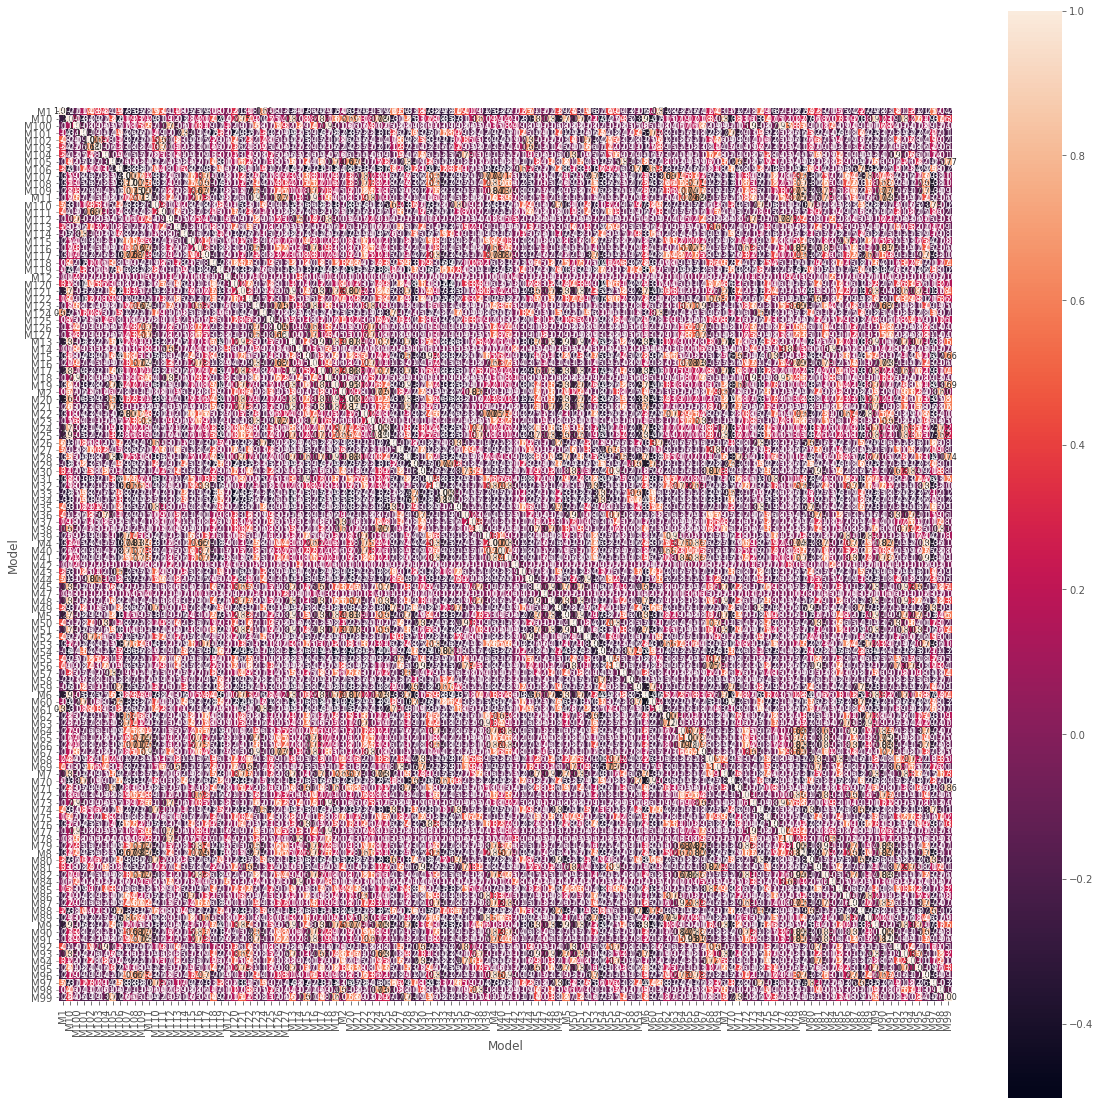

In [263]:
correlation = sale.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values)

In [264]:
#sale.Model.value_counts()

In [265]:
#from sklearn.preprocessing import OneHotEncoder

#Ohe = OneHotEncoder(sparse=False)
#Model=Ohe.fit_transform(sale[['Model']])

#Model

In [266]:
#sale['Model']= Model
#sale.head()

In [267]:
from datetime import datetime
sale['Date'] = pd.to_datetime(sale['Date'], dayfirst=True)
sale['Date'] = sale['Date'].values.astype(np.int64) // 10 ** 9
sale.head(500)

Model        Date  M1  M10  M100  M101  M102  M103  M104  M105  M106  ...  \
0      1388534400   0    0     0     0     0     0     0     0     0  ...   
1      1388620800   0    0     0     0     0     0     0     0     0  ...   
2      1388707200   0    0     0     0     0     0     0     0     0  ...   
3      1388793600   0    0     0     0     0     0     0     0     0  ...   
4      1389052800   0    0     0     0     0     0     0     0     0  ...   
..            ...  ..  ...   ...   ...   ...   ...   ...   ...   ...  ...   
495    1431561600  77    0     0     2    13     3    31     0     3  ...   
496    1431648000  54    0     0     0    11     1    17     0     4  ...   
497    1431734400  87    0     0     1    15     3    30     0     8  ...   
498    1431820800  78    0     0     0    11     2    29     0     4  ...   
499    1431907200  82    0     0     0     9     3    26     0     4  ...   

Model  M90  M91  M92  M93  M94  M95  M96  M97  M98  M99  
0        0    0    0    0    0    0    0    0    0    0  
1        0    0    0    0    0    0    0    1    0    0  
2        0    0    0    0    0    0    0    0    0    0  
3        0    0    0    0    0    0    0    0    0    0  
4        0    0    0    0    0    0    0    0    0    0  
..     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
495      0    0   65    0  112    1    0   59    0    0  
496      0    0   47    0   71    0    0   37    0    0  
497      0    0   50    0  108    0    0   53    0    0  
498      0    0   45    0  104    0    0   45    0    0  
499      0    0   58    0   85    0    1   52    0    0  

[500 rows x 125 columns]

# Data split 


In [268]:
 # split into train and test sets
y = sale['M99'].values 
x = sale.drop(['M99'], axis = 1)


In [269]:
##Data training
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [270]:
#feature Scalling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test  = scaler.transform(X_test_org)

In [271]:
 print("Size of training set: {}      size of test set: {}\n".format(X_train.shape[0], X_test.shape[0]))

Size of training set: 728      size of test set: 243



# Linear Regression

In [272]:
#for LINEAR Regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)
print('Train score: %.4f'%linreg.score(X_train,y_train))


Train score: 0.9340


In [273]:
print('Test score: %.4f'%linreg.score(X_test,y_test))

Test score: -227411299326925116553560064.0000


In [274]:
 y_pred_lin = linreg.predict(X_train)
 print('predicted response:', y_pred_lin, sep='\n')
 print("Average predict response: {:.2f}".format(y_pred_lin.mean()))

predicted response:
[-3.40490315e-01  1.29525105e+00  2.49544666e+00  3.16017700e+00
  1.54887290e+01  1.83012219e+01  2.12468397e+00  3.52175607e+00
  4.60806496e+00 -2.92036890e+00 -1.75206223e+00 -3.44639234e-01
 -4.62348445e-01  2.81868478e+01 -2.73429876e-01  1.04509354e+02
  2.15866065e-02  4.80997997e+00  5.95632227e-01  3.48562470e+01
 -2.30360470e-01 -7.36654072e-01  2.02410428e-01  4.22650437e-01
 -5.99116794e-01  3.91759504e+01  3.07285670e+00 -8.41688307e-01
  4.99521912e+01  2.88375705e+00  1.86410194e+00  4.83335955e-02
 -5.85722311e-02  4.99173076e-02  1.30772257e+01  4.56553402e+01
  1.57775904e+01 -3.27357250e-01 -1.26263403e+00 -3.35470959e+00
  4.56268061e+00  1.22177277e+01 -1.23634086e-01  1.57951083e+01
  1.73264834e-01  5.05291951e+00  1.32622312e+00 -1.46476847e+00
  1.28178000e+00  4.92351196e-01 -2.53176067e-01  3.12682184e+00
  1.01677906e+01 -8.79814346e+00  2.55679094e-02  1.36348804e-01
  3.19247447e-01 -1.31180463e-01 -6.01749556e-02 -1.10849340e+00
  7.2

In [275]:
from sklearn.metrics import mean_squared_error
lin_train_mse = mean_squared_error( y_train,y_pred_lin )
print('Train mse :',lin_train_mse)


Train mse : 31.704552250759722


In [276]:
Lin_train_rmse = np.sqrt(lin_train_mse)
print( 'Train Rmse :' ,Lin_train_rmse)

Train Rmse : 5.630679554970228


In [277]:
 y_pred_test_lin = linreg.predict(X_test)
 print('test predicted response:', y_pred_test_lin, sep='\n')
 print("Average test predict response: {:.2f}".format(y_pred_test_lin.mean()))

test predicted response:
[ 6.55850767e+00  3.02448670e-01 -1.53819378e-02  4.06028874e+01
 -2.92871005e+00  1.72490447e+01  4.46712828e+01  8.76853029e+00
 -5.07969181e+00  7.17964553e-01 -2.34992757e-01  2.29226638e+00
 -6.20256130e+00  5.94106568e+01  2.33049701e+01  1.56799870e+01
  2.83550338e+01  1.92105117e-02  7.06570303e+01  6.58582979e+01
 -5.77442938e-03  2.42586420e+01 -1.71638266e+00  7.91808630e-01
  5.57715997e+01  7.50171371e-01 -3.62507530e+00 -7.68372647e-01
 -1.04921524e+01  3.46934697e+00  3.15222104e+01  1.50231437e+00
  4.31680719e-01  1.28373527e+00  1.43607108e+00 -1.28194266e+00
 -1.09885765e+00 -3.87497505e-01  1.45800754e+01 -1.64362425e+00
  4.28018185e-01 -1.57190490e-01 -4.47172172e-01  1.47435620e+01
  1.31011650e+00  3.38874699e-01  7.66003660e+01  5.11399302e+15
 -6.53979470e-01  1.13923109e+00 -8.23157224e-03 -8.78099701e-01
 -6.61808169e+00 -2.37279428e-01  8.22636066e-01 -1.35943191e+00
  6.20092828e-01  6.37047278e-01  4.41325604e+00  1.49717798e+01


In [278]:
lin_test_mse = mean_squared_error( y_test,y_pred_test_lin )
print('Test mse : ',lin_test_mse)

Test mse :  1.0762520399056503e+29


In [279]:
Lin_test_rmse = np.sqrt(lin_test_mse)
print('Test Rmse : ' ,Lin_test_rmse)

Test Rmse :  328062804948328.5
